In [1]:
from classifiers.dtc.utils import *
from classifiers.dtc import *

In [2]:
print("--- Testing gini and entropy ---")
labels1 = np.array([0, 0, 1, 1])
print(f"Gini([0, 0, 1, 1]): {gini(labels1):.4f}, Entropy: {entropy(labels1):.4f}")
# Expected Gini: 0.5, Entropy: 1.0

labels2 = np.array([0, 0, 0])
print(f"Gini([0, 0, 0]): {gini(labels2):.4f}, Entropy: {entropy(labels2):.4f}")
# Expected Gini: 0.0, Entropy: 0.0

labels3 = np.array([0, 1, 2])
print(f"Gini([0, 1, 2]): {gini(labels3):.4f}, Entropy: {entropy(labels3):.4f}")
# Expected Gini: 0.6667, Entropy: 1.5850

--- Testing gini and entropy ---
Gini([0, 0, 1, 1]): 0.5000, Entropy: 1.0000
Gini([0, 0, 0]): 0.0000, Entropy: -0.0000
Gini([0, 1, 2]): 0.6667, Entropy: 1.5850


In [3]:
print("\n--- Testing split (continuous) ---")
X_split = np.array([[1], [2], [3], [4]])
y_split = np.array([0, 0, 1, 1])
left_idx, right_idx, _, _, _, _ = split(X_split, y_split, 0, 2.5)
print(f"Split at 2.5, left indices: {left_idx}, right indices: {right_idx}")
# Expected left: [0, 1], right: [2, 3]


--- Testing split (continuous) ---
Split at 2.5, left indices: [0 1], right indices: [2 3]


In [4]:
print("\n--- Testing is_categorical ---")
X_cat = np.array([[1], [2], [1], [3], [2]])
print(f"Is feature 0 of X_cat categorical?: {is_categorical(X_cat, 0)}")
# Expected: True (5 unique values <= default threshold of 10)

X_cont = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]])
print(f"Is feature 0 of X_cont categorical?: {is_categorical(X_cont, 0)}")
# Expected: False (11 unique values > default threshold of 10)


--- Testing is_categorical ---
Is feature 0 of X_cat categorical?: True
Is feature 0 of X_cont categorical?: False


In [5]:
print("\n--- Testing categorical_split ---")
X_cat_split = np.array([['A'], ['B'], ['A'], ['C'], ['B']])
y_cat_split = np.array([0, 0, 1, 1, 0])
left_idx_cat, right_idx_cat, _, y_left_cat, _, y_right_cat = categorical_split(X_cat_split, y_cat_split, 0)
print(f"Categorical split, left indices: {left_idx_cat}, right indices: {right_idx_cat}")
print(f"Left labels: {y_left_cat}, Right labels: {y_right_cat}")
# The output might vary depending on the best split found.
# One possibility: left on 'A', right on 'B', 'C'


--- Testing categorical_split ---
Categorical split, left indices: [1 4], right indices: [0 2 3]
Left labels: [0 0], Right labels: [0 1 1]


In [6]:
print("\n--- Testing best_split (integration) ---")
X_best = np.array([[1, 'A'], [2, 'B'], [1, 'A'], [3, 'C'], [2, 'B'], [3, 'C'], [4, 'A'], [5, 'B'], [6, 'C'], [7, 'A'], [8, 'B'], [9, 'C'], [10, 'A'], [11, 'B']])
y_best = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
best_feature_idx, best_thresh_best, _, _ = best_split(X_best, y_best)
print(f"Best split feature index: {best_feature_idx}, best threshold: {best_thresh_best}")
# The output will depend on which split yields the highest information gain.
# It could be on the continuous feature (index 0) or the categorical (index 1).


--- Testing best_split (integration) ---
Best split feature index: 0, best threshold: ['10', '11']


In [7]:
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names_wine = wine.feature_names
target_names_wine = wine.target_names

print("Wine dataset feature names:", feature_names_wine)
print("Number of samples:", X_wine.shape[0])
print("Number of features:", X_wine.shape[1])
print("Target classes:", target_names_wine)

Wine dataset feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of samples: 178
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import pandas as pd

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42
)

# Instantiate our Decision Tree Classifier, setting a categorical threshold
dtc_mixed = DecisionTreeClassifier(max_depth=5, categorical_threshold=6) # Let's say if a feature has <= 6 unique values, treat as categorical

# Train the classifier
dtc_mixed.fit(X_train_wine, y_train_wine, target_names=target_names_wine)

# Make predictions on the test set
y_pred_mixed = dtc_mixed.predict(X_test_wine)

# Evaluate performance
accuracy_mixed = accuracy_score(y_test_wine, y_pred_mixed)
print(f"\nAccuracy on Wine dataset: {accuracy_mixed*100:.4f}%")

# Print summary
summary_mixed = dtc_mixed.summary(X_test_wine, y_test_wine, target_names=target_names_wine)
print("\nClassification Report (Custom DTC on Wine):\n", summary_mixed)


Accuracy on Wine dataset: 94.4444%

Classification Report (Custom DTC on Wine):
              class_0    class_1    class_2  accuracy  macro avg  weighted avg
precision   0.944444   0.913043   1.000000  0.944444   0.952496      0.946636
recall      0.894737   1.000000   0.928571  0.944444   0.941103      0.944444
f1-score    0.918919   0.954545   0.962963  0.944444   0.945476      0.944193
support    19.000000  21.000000  14.000000  0.944444  54.000000     54.000000


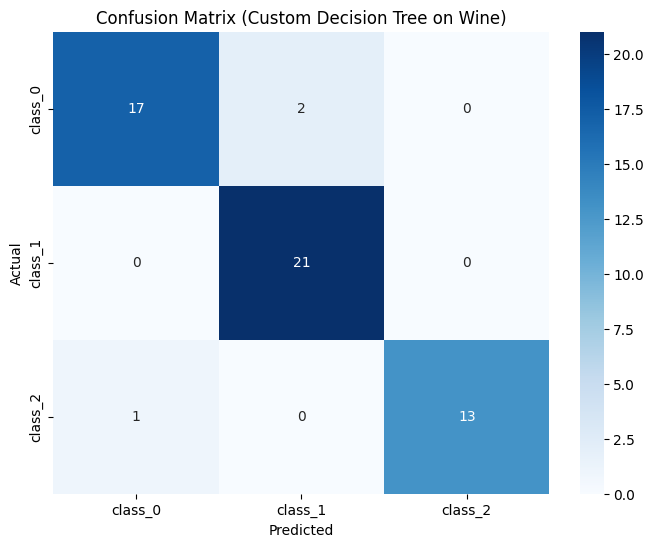

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_wine, y_pred_mixed)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_wine, yticklabels=target_names_wine)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Custom Decision Tree on Wine)')
plt.show()

In [10]:
print("\n--- Inspecting the Decision Tree with Feature Type ---")
dtc_mixed.inspect_tree()


--- Inspecting the Decision Tree with Feature Type ---
Feature 9 (Continuous) <= 3.82
Left:
  Feature 2 (Continuous) <= 3.07
  Left:
    Feature 11 (Continuous) <= 3.82
    Left:
      Leaf: class 1
    Right:
      Leaf: class 0
  Right:
    Leaf: class 0
Right:
  Feature 6 (Continuous) <= 1.40
  Left:
    Leaf: class 2
  Right:
    Feature 12 (Continuous) <= 724.50
    Left:
      Feature 0 (Continuous) <= 13.14
      Left:
        Leaf: class 1
      Right:
        Leaf: class 0
    Right:
      Leaf: class 0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

try:
    titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
except Exception as e:
    print(f"Error loading Titanic dataset: {e}")
    print("Please ensure you have 'titanic.csv' in the current directory or provide a valid path.")
    exit()

titanic_df_cleaned = titanic_df.dropna()
titanic_df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [12]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
data = titanic_df[features + [target]].dropna()

X_titanic = data[features].values
y_titanic = data[target].values

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_titanic, y_titanic, test_size=0.3, random_state=42
)

dtc_titanic = DecisionTreeClassifier(max_depth=3, categorical_threshold=10, min_impurity_decrease=0.01, min_in_category=5)
dtc_titanic.fit(X_train_titanic, y_train_titanic)

y_pred_titanic = dtc_titanic.predict(X_test_titanic)
accuracy_test = accuracy_score(y_test_titanic, y_pred_titanic)
f1_test = f1_score(y_test_titanic, y_pred_titanic)
print(f"\nAccuracy on Test set: {accuracy_test*100:.4f}%")
print(f"F1-score on Test set: {f1_test*100:.4f}%")

y_pred_train_titanic = dtc_titanic.predict(X_train_titanic)
accuracy_train = accuracy_score(y_train_titanic, y_pred_train_titanic)
f1_train = f1_score(y_train_titanic, y_pred_train_titanic)
print(f"\nAccuracy on Training set: {accuracy_train*100:.4f}%")
print(f"F1-score on Training set: {f1_train*100:.4f}%")

print("\n--- Inspecting the Decision Tree with Feature Type ---")
dtc_titanic.inspect_tree()



Accuracy on Test set: 75.2336%
F1-score on Test set: 68.6391%

Accuracy on Training set: 79.1165%
F1-score on Training set: 72.4868%

--- Inspecting the Decision Tree with Feature Type ---
Feature 1 (Categorical) in ['male']
Left:
  Leaf: class 0
Right:
  Leaf: class 1


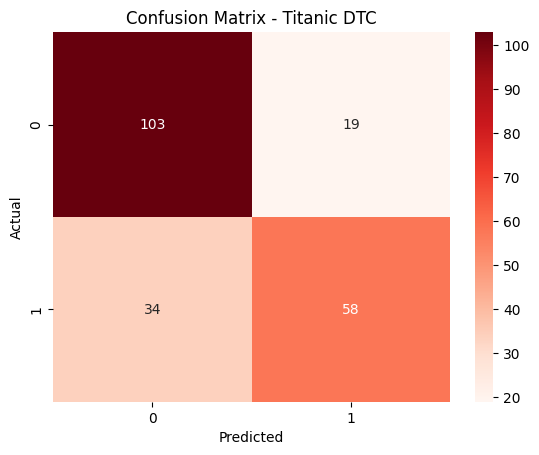

In [13]:
cm = confusion_matrix(y_test_titanic, y_pred_titanic)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Titanic DTC')
plt.show()


Accuracy on Breast Cancer dataset: 96.4912%
F1-score on Breast Cancer dataset: 97.2222%


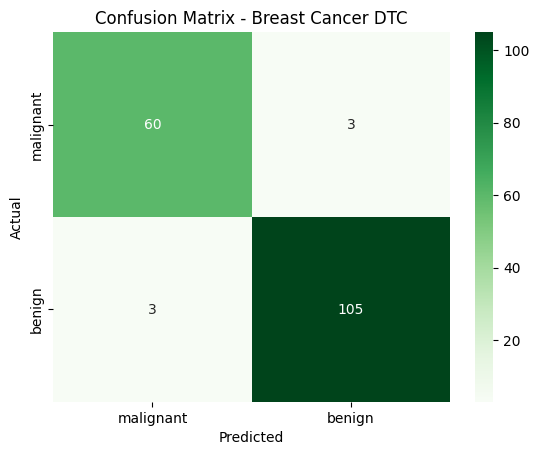

In [14]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target
feature_names_bc = breast_cancer.feature_names
target_names_bc = breast_cancer.target_names

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.3, random_state=42
)

dtc_bc = DecisionTreeClassifier(max_depth=4, categorical_threshold=10, min_impurity_decrease=0.03)
dtc_bc.fit(X_train_bc, y_train_bc, target_names=target_names_bc)

y_pred_bc = dtc_bc.predict(X_test_bc)

accuracy_bc = accuracy_score(y_test_bc, y_pred_bc)
f1_bc = f1_score(y_test_bc, y_pred_bc)
print(f"\nAccuracy on Breast Cancer dataset: {accuracy_bc*100:.4f}%")
print(f"F1-score on Breast Cancer dataset: {f1_bc*100:.4f}%")

cm_bc = confusion_matrix(y_test_bc, y_pred_bc)
sns.heatmap(cm_bc, annot=True, fmt='d', cmap='Greens', xticklabels=target_names_bc, yticklabels=target_names_bc)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer DTC')
plt.show()